In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np  
from scipy.integrate import odeint

In [4]:
# ja manipulada
# Eq. nao linearizada do pendulo 
def nonlinearizedVector(y, t, I, M, m, g, l, b, u):
    x, dx, phi, dphi = y

    sen_phi = np.sin(phi)
    cos_phi = np.cos(phi)
    
    beta = m*l
    beta_sin = beta*sen_phi
    beta_cos = beta*cos_phi
    alpha = I + beta*l
    gama = M + m
    #ddphi = -beta_cos*(u + beta_sin*dphi*dphi - b*dx)/(I*gama + beta*M*l + beta_sin**2)
    #ddx = (u + beta_sin*dphi*dphi -beta_cos*ddphi - b*dx)/(gama)
    ddx = (u + beta**2/gama*sen_phi*cos_phi + beta*dphi*dphi*sen_phi - b*dx) /(gama - beta*beta * cos_phi * cos_phi)
    ddphi = -beta*g*sen_phi/alpha - beta*ddx*cos_phi/alpha
    return [dx, ddx, dphi, ddphi]

In [5]:
#Eq. linearizada resolvida via tranformada de laplace
def linearizedVector(y, t, I, M, m, g, l, b, u):
    x, dx, phi, dphi = y    # os valores de y = f(...) são passados como parametros
                                # da função para fazer o calculo de integração e resolução 
                                # de EDO (y = odeint(function, y0, t, args=(...))). isso 
                                # acontece pois os valores passados de y são usados para calcular
                                # para calcular os próximos.
    # valores que se repetem no calculo(evitar calcular o mesmo valor várias vezes)
    ml = m * l 
    u_bdx = u - b * dx
    gphi = g * phi
    Mm = (M + m)
    P = I * Mm + M * ml * l
    iml = I + ml * l  
    
    # calculo das derivadas com base no modelo linearizado
    ddx = (u_bdx * iml + (ml**2)*gphi) / P
    ddphi = ml * (Mm*gphi + u_bdx) / P
    
    #retorno dos valores...
    return [dx, ddx, dphi, ddphi]

In [25]:
# valores das constantes
M = 0.500
m = 0.200
l = 0.3
I = 0.006
u = 10
g = 9.81
b = 0.1


# variação de tempo
t = np.linspace(0, 100, 100000)

q = (M + m)*(I + m*l*l) - m*m*l*l
coeffs = [1, b*(I + m *l**2)/q, -(M+m)*m*g*l/q, -b*m*g*l/q, 0]
for coeff in coeffs:
    print(coeff)
roots = np.roots(coeffs)
for root in roots:
    print(root)
# valores iniciais do sistema
x = 0.00
dx = 0.01
phi = 0.001
dphi = 0.001
y0 = [x, dx, phi, dphi]

# resolução da EDO e integração
y = odeint(linearizedVector, y0, t, args=(I, M, m, g, l, b, u))
print(y)

1
0.18181818181818185
-31.21363636363637
-4.459090909090911
0
5.567955608637305
-5.606942128751806
-0.14283166170368242
0.0
[[0.00000000e+000 1.00000000e-002 1.00000000e-003 1.00000000e-003]
 [1.90910397e-005 2.81812273e-002 1.02373969e-003 4.64778039e-002]
 [5.63619255e-005 4.63592721e-002 1.09295419e-003 9.19487781e-002]
 ...
 [3.83189428e+240 2.13358172e+241 4.58524414e+241 2.55304358e+242]
 [3.85328982e+240 2.14549467e+241 4.61084604e+241 2.56729861e+242]
 [3.87480482e+240 2.15747412e+241 4.63659089e+241 2.58163323e+242]]


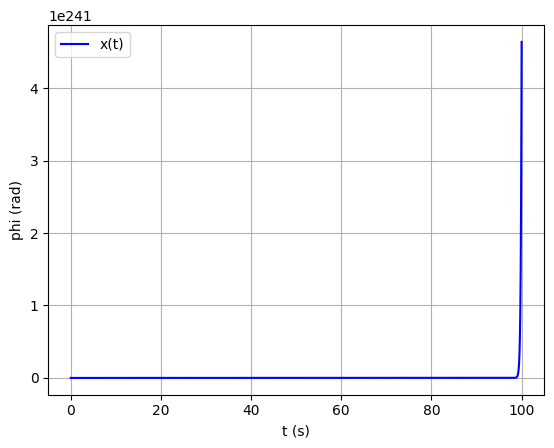

In [28]:
# variação de tempo
t = np.linspace(0, 100, 100000)

# plotagem dos grafico de distancia
plt.plot(t, y[:, 2], 'b', label='x(t)')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('phi (rad)')
plt.grid()

plt.show()

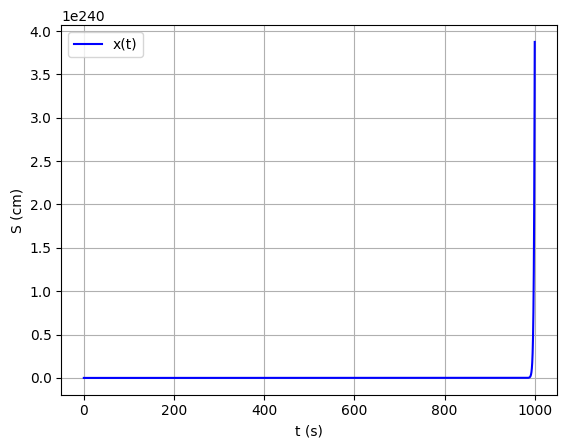

In [ ]:
# variação de tempo
t = np.linspace(0, 10000, 100000)

# plotagem dos grafico de ângulo
plt.plot(t, y[:, 0], 'b', label='x(t)')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('S (cm)')
plt.grid()

plt.show()